In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:

def objecttive_fun(x):
    
    return np.sum(np.square(x))

    pass

In [3]:

# detail of objective function

nvar=10

ub =np.ones(nvar, dtype=int)
lb =np.ones(nvar, dtype=int)

ub*=10
lb*=(-10)

# print(ub)


# define the pso parameter

no_particle = 10
max_iter = 500
w_max = 0.9
w_min= 0.2

v_max = (ub - lb) * 0.2
v_min = -v_max

c1= 2
c2=2



In [4]:
v_min

array([-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.])

In [6]:
def swarm_creation():

    x= []
    for i in range(no_particle):
        particle = {
            'X': (ub- lb) * np.random.rand(nvar) + lb,
            'V': np.zeros(nvar),
            'Pbest':{
                'X': np.zeros(nvar),
                'O': np.inf
            }
        }
        x.append(particle)


    swarm = {
        'particle':x,

        'Gbest':{
            'X': np.zeros(nvar),
            'O': np.inf
        }
    }
    
    
    return swarm
    

In [7]:
swarm = swarm_creation()

gbest=[]

for t in range(1,max_iter+1):
    
    for k in range(no_particle):
        currentX = swarm['particle'][k]['X']
        currentO = objecttive_fun(currentX)
  
        if currentO < swarm['particle'][k]['Pbest']['O']:
            swarm['particle'][k]['Pbest']['X'] = currentX
            swarm['particle'][k]['Pbest']['O'] = currentO

        if currentO < swarm['Gbest']['O']:
            swarm['Gbest']['X'] = currentX
            swarm['Gbest']['O'] = currentO


    w = w_max - (t) * ((w_max - w_min)/max_iter)

   
    for k in range(no_particle):
        swarm['particle'][k]['V'] = w * swarm['particle'][k]['V'] \
        + c1 * np.random.rand(nvar) * (swarm['particle'][k]['Pbest']['X'] - swarm['particle'][k]['X']) \
        + c2 * np.random.rand(nvar) * (swarm['Gbest']['X'] - swarm['particle'][k]['X'])

        
        # linmiting velocity
        swarm['particle'][k]['V'] = np.minimum(swarm['particle'][k]['V'], v_max)
        swarm['particle'][k]['V'] = np.maximum(swarm['particle'][k]['V'], v_min)
        
        
        swarm['particle'][k]['X'] = swarm['particle'][k]['X'] + swarm['particle'][k]['V']
        
        
        swarm['particle'][k]['X'] = np.minimum(swarm['particle'][k]['X'], ub)
        swarm['particle'][k]['X'] = np.maximum(swarm['particle'][k]['X'], lb)

        
    gbest.append([swarm['Gbest']['O']])
print(f"Iter = {t}, Gbest={swarm['Gbest']['O']}")
   

Iter = 500, Gbest=1.7051060970784844e-11


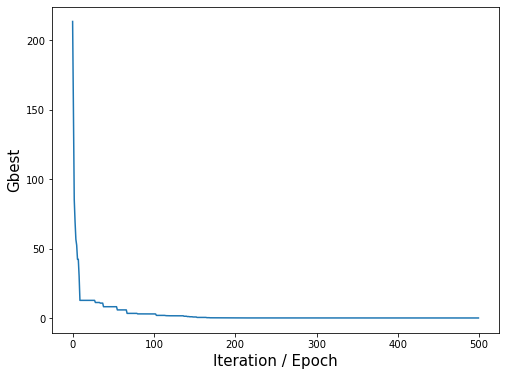

In [106]:


plt.figure(figsize = (8,6))
plt.plot(range(max_iter), gbest)
plt.xlabel("Iteration / Epoch",fontsize=15)
plt.ylabel("Gbest",fontsize=15)
plt.show()

In [34]:
# swarm

In [93]:
swarm['particle'][1]

{'X': array([ 1.20657083e-05, -1.04066195e-06,  6.15591336e-07,  4.02607417e-06,
         1.53976943e-06,  3.06548239e-06,  3.72931907e-06,  2.55584409e-06,
         9.04101727e-07,  3.57702826e-06]),
 'V': array([-4.32513978e-07,  1.41257112e-11,  4.02216959e-13, -6.16775728e-13,
         2.11014874e-11, -7.33176322e-15, -2.13319990e-13, -4.57002016e-13,
         1.68220584e-12,  4.01132803e-15]),
 'Pbest': {'X': array([ 1.24982223e-05, -1.04067607e-06,  6.15590934e-07,  4.02607478e-06,
          1.53974833e-06,  3.06548239e-06,  3.72931928e-06,  2.55584455e-06,
          9.04100045e-07,  3.57702826e-06]),
  'O': 2.1969749600392342e-10}}

In [92]:
swarm['particle'][1]['V'][index]

array([-6.16775728e-13,  2.11014874e-11])

In [48]:
np.where(swarm['particle'][1]['V'] > -2.38846236e-09)

(array([0, 2, 3, 4, 5, 6, 7, 9], dtype=int64),)

In [50]:
# np.minimum(swarm['particle'][k]['V'], -2.38846236e-09)

array([-2.38846236e-09, -2.38846236e-09, -2.38846236e-09, -2.38846236e-09,
       -2.38846236e-09, -2.38846236e-09, -2.38846236e-09, -2.38846236e-09,
       -2.38846236e-09, -2.38846236e-09])

In [75]:
arr=np.array([1,2,3,4,6])

In [89]:
index=np.where(arr>3)

In [90]:
index

(array([3, 4], dtype=int64),)

In [91]:
arr[index]=3

In [79]:
arr

array([1, 2, 3, 4, 6])

In [100]:
 np.minimum(arr, 3)

array([1, 2, 3, 3, 3])